1) Probability and Expected Value**

   - Generate 10,000 random samples of flipping 3 coins (use `np.random.binomial()`)
   - Plot the probability distribution of getting 0, 1, 2, or 3 heads
   - Calculate the expected value (mean) of your distribution
   - Compare your empirical results with the theoretical probability for each outcome

In [12]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from math import comb
import seaborn as sns
import warnings

from scipy import stats # for statistical functions for question 2

from scipy.stats import pearsonr # for correlation coefficient for question 3

In [5]:
warnings.filterwarnings("ignore")

# Set seed for reproducibility (optional)
np.random.seed(42)

n_flips = 3
p_heads = 0.5
np.random.binomial(3, 0.5)

results = np.random.binomial(n_flips, p_heads, 10000)
print(results)

[3 2 2 ... 1 1 1]


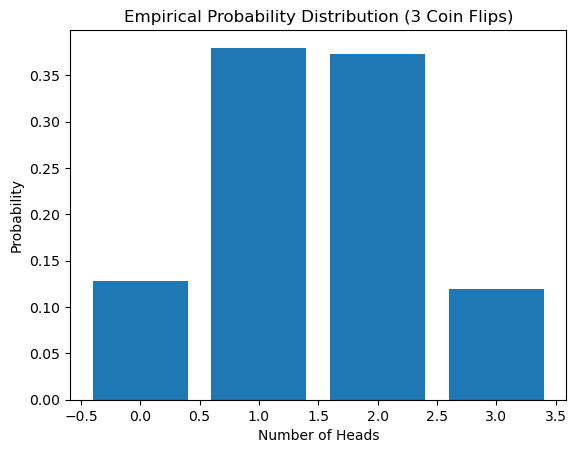

In [6]:
# Possible outcomes
outcomes = np.array([0, 1, 2, 3])

# Empirical probabilities
counts = np.bincount(results, minlength=4)
empirical_probs = counts / len(results)

# Plot
plt.bar(outcomes, empirical_probs)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("Empirical Probability Distribution (3 Coin Flips)")
plt.show()


In [7]:
expected_value_empirical = np.mean(results)
expected_value_empirical


1.4842

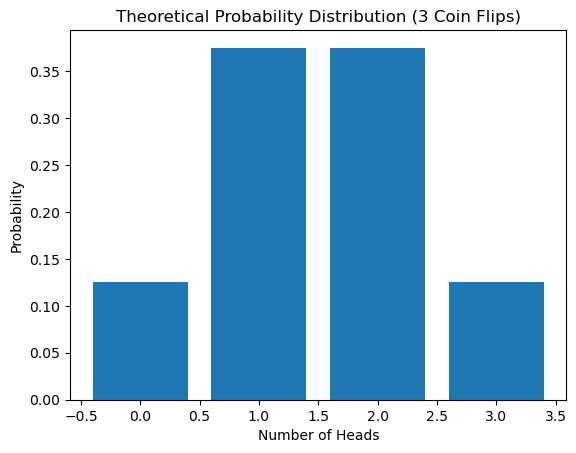

In [11]:
# Theoretical probabilities
theoretical_probs = np.array([
    comb(3, k) * (0.5 ** 3) for k in outcomes
])


# Plot
plt.bar(outcomes, theoretical_probs)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("Theoretical Probability Distribution (3 Coin Flips)")
plt.show()

2) Normal Distribution and Statistical Testing**

   - Generate two samples from normal distributions:
     - Sample A: 100 values with mean=70, std=5
     - Sample B: 100 values with mean=73, std=5
   - Create a box plot comparing the two distributions
   - Conduct an independent t-test to determine if the means are significantly different
   - Calculate and visualize the 95% confidence intervals for both samples

In [2]:
np.random.seed(42)  # for reproducibility

# Sample A
sample_a = np.random.normal(loc=70, scale=5, size=100)

# Sample B
sample_b = np.random.normal(loc=73, scale=5, size=100)


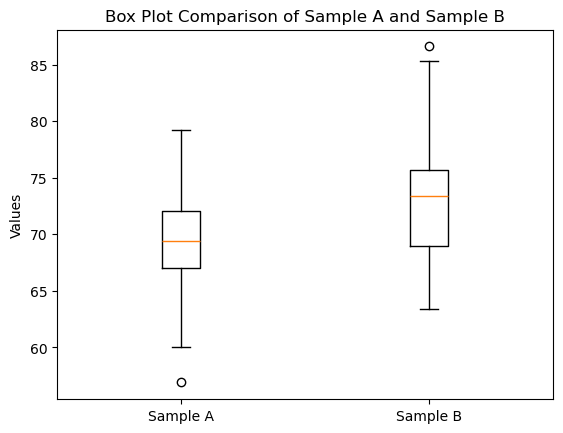

In [3]:
plt.figure()
plt.boxplot([sample_a, sample_b], labels=['Sample A', 'Sample B'])
plt.title('Box Plot Comparison of Sample A and Sample B')
plt.ylabel('Values')
plt.show()


In [4]:
t_stat, p_value = stats.ttest_ind(sample_a, sample_b)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")


T-statistic: -5.514
P-value: 0.0000


Interpretation
p < 0.05 → statistically significant difference
p ≥ 0.05 → no significant difference

In [10]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean, mean - margin, mean + margin

mean_a, ci_a_low, ci_a_high = confidence_interval(sample_a)
mean_b, ci_b_low, ci_b_high = confidence_interval(sample_b)

print ("Mean a",mean_a)
print ("Mean b",mean_b)

print("Sample A CI:", (ci_a_low, ci_a_high))
print("Sample B CI:", (ci_b_low, ci_b_high))


Mean a 69.48076741302954
Mean b 73.11152293524964
Sample A CI: (68.57976581819051, 70.38176900786857)
Sample B CI: (72.1653798708355, 74.05766599966378)


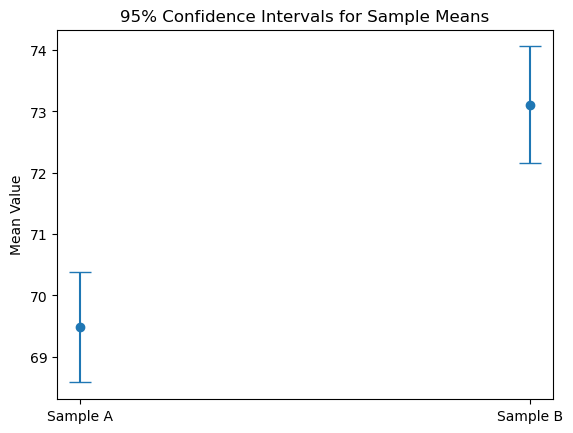

In [11]:
means = [mean_a, mean_b]
lower_errors = [mean_a - ci_a_low, mean_b - ci_b_low]
upper_errors = [ci_a_high - mean_a, ci_b_high - mean_b]

plt.figure()
plt.errorbar(
    x=['Sample A', 'Sample B'],
    y=means,
    yerr=[lower_errors, upper_errors],
    fmt='o',
    capsize=8
)
plt.title('95% Confidence Intervals for Sample Means')
plt.ylabel('Mean Value')
plt.show()




If confidence intervals do not overlap much, it often supports the t-test result.

3. **Correlation Analysis**
   - Using the iris dataset (from seaborn), analyze the relationship between:
     - Sepal length and petal length
     - Sepal width and petal width
   - For each pair:
     - Create a scatter plot
     - Calculate the Pearson correlation coefficient and p-value
     - Calculate and interpret the R-squared value
   - Which pair shows a stronger relationship? Explain why.

In [ ]:
#Load iris dataset
iris = sns.load_dataset("iris")

# Show data
#iris.head() - Preview data
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


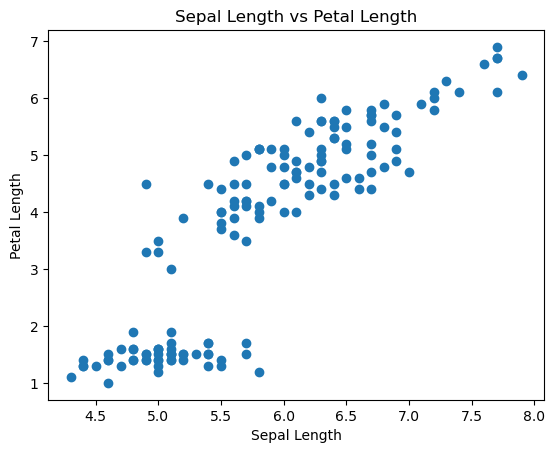

In [ ]:
# Scatter plot of Sepal Length vs Petal Length
plt.figure()
plt.scatter(iris['sepal_length'], iris['petal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.show()


In [ ]:
#Pearson Correlation, p-value, and R²
r_sl_pl, p_sl_pl = pearsonr(iris['sepal_length'], iris['petal_length'])
r2_sl_pl = r_sl_pl ** 2

print(f"Pearson r: {r_sl_pl:.3f}")
print(f"P-value: {p_sl_pl:.5f}")
print(f"R-squared: {r2_sl_pl:.3f}")


Pearson r: 0.872
P-value: 0.00000
R-squared: 0.760


Interpretation
- Pearson r → Strength & direction of linear relationship
- p-value < 0.05 → Statistically significant correlation
- R² → Proportion of variance in petal length explained by sepal length


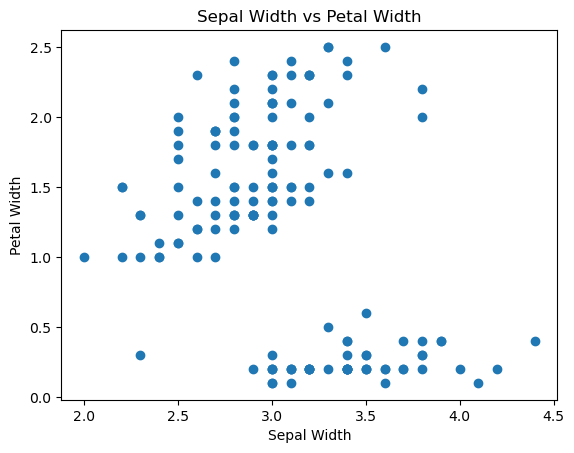

In [17]:
#Sepal Width vs Petal Width
plt.figure()
plt.scatter(iris['sepal_width'], iris['petal_width'])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Sepal Width vs Petal Width')
plt.show()


In [18]:
#Pearson Correlation, p-value, and R²
r_sw_pw, p_sw_pw = pearsonr(iris['sepal_width'], iris['petal_width'])
r2_sw_pw = r_sw_pw ** 2

print(f"Pearson r: {r_sw_pw:.3f}")
print(f"P-value: {p_sw_pw:.5f}")
print(f"R-squared: {r2_sw_pw:.3f}")


Pearson r: -0.366
P-value: 0.00000
R-squared: 0.134


Conclusion:

Sepal Length vs Petal Length
- Pearson r: 0.872
- R-squared: 0.760
Strength: Strong postive

Sepal Width vs Petal Width
- Pearson r: -0.366
- R-squared: 0.134
Strength: weak, moderate

Reason:
- Much higher Pearson correlation
- Higher R-squared mean
~76% of the variation in petal length is explained by sepal length
- Scatter plot shows a clear linear trend
- Sepal width and petal width are more scattered and less predictable